# **Heart Disease Prediction**

# Step 1- Import Libraries

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Data Manipulation
import numpy as np
import pandas as pd

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# KNN
from sklearn.neighbors import KNeighborsClassifier

# SVM
from sklearn.svm import SVC

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer


# Step 2- Read Dataset

In [2]:
heart_df= pd.read_csv('/content/heart.csv')

In [3]:
heart_df = pd.DataFrame(heart_df)

In [4]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Step 3- Dataset Overview & Preparation


Step 3.1 | Description Of Variables


age: Age of the patient in years

sex: Gender of the patient (0: female, 1: male)

cp: Type of chest pain (0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic)

trtbps: Resting blood pressure in mmHg

chol: Serum cholesterol in mg/dl

fbs: Fasting blood sugar level categorized as above 120 mg/dl (0: false, 1: true)

restecg: Resting electrocardiographic results (0: Normal, 1: ST-T wave abnormality, 2: Showing probable or definite left ventricular hypertrophy)

thalachh: Maximum heart rate achieved during a stress test exng: Exercise induced angina (0: no, 1: yes)

oldpeak: ST depression induced by exercise relative to rest (unit -> depression)

slp: Slope of the peak exercise ST segment (0: Upsloping, 1: Flat, 2: Downsloping)

caa: Number of major vessels (0-4) colored by fluoroscopy thall: Thalium stress test result (0: Normal, 1: Fixed defect, 2: Reversible defect, 3: Not described)

output: Heart disease status (0: no disease, 1: presence of disease)

Step 3.2 | Rename Variables

In [5]:
# Renamed name of variables to have a better understanding while working on dataset:
heart_df.rename(columns={
    "age":"Age",
    "sex":"Sex",
    "cp":"ChestPain",
    "trestbps":"RestingBloodPressure",
    "chol":"Cholesterol",
    "fbs":"FastingBloodSugar",
    "restecg":"RestingECG",
    "thalach":"MaxHeartRate",
    "exang":"ExerciseInducedAngina",
    "oldpeak":"OldPeak",
    "slope":"STSlope",
    "ca":"nMajorVessels",
    "thal":"Thalium",
    "target":"Status"
}, inplace=True)

In [6]:
#Changed the integer values of some variables to categorical values based on description of variables:
mappings = {
    'Sex': {
        0: "Female",
        1: "Male"
    },
    'ChestPain': {
        0: "Typical angina",
        1: "Atypical angina",
        2: "Non-anginal pain",
        3: "Asymptomatic"
    },
    "FastingBloodSugar": {
        0:False,
        1:True
    },
    "RestingECG": {
        0:"Normal",
        1:"Abnormality",
        2:"Hypertrophy"
    },
    "ExerciseInducedAngina": {
        0:"No",
        1:"Yes"
    },
    "STSlope": {
        0:"Upsloping",
        1:"Flat",
        2:"Downsloping"
    },
    "Thalium": {
        0:"Normal",
        1:"Fixed defect",
        2:"Reversible defect",
        3:"Not described"
    },
    "Status": {
        0:"No Disease",
        1:"Heart Disease"
    }
}

In [7]:
#First five Row
heart_df.head()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
# Last Five Row
heart_df.tail()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [9]:
heart_df.shape

(1025, 14)

Step 3.4 | Basic Information

In [10]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1025 non-null   int64  
 1   Sex                    1025 non-null   int64  
 2   ChestPain              1025 non-null   int64  
 3   RestingBloodPressure   1025 non-null   int64  
 4   Cholesterol            1025 non-null   int64  
 5   FastingBloodSugar      1025 non-null   int64  
 6   RestingECG             1025 non-null   int64  
 7   MaxHeartRate           1025 non-null   int64  
 8   ExerciseInducedAngina  1025 non-null   int64  
 9   OldPeak                1025 non-null   float64
 10  STSlope                1025 non-null   int64  
 11  nMajorVessels          1025 non-null   int64  
 12  Thalium                1025 non-null   int64  
 13  Status                 1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Step 3.5 | Statistical Summary

In [11]:
stats_heart_df = heart_df.copy()

In [12]:
# Statistical summary of numerical data
stats_heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
Sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
ChestPain,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
RestingBloodPressure,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
Cholesterol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
FastingBloodSugar,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
RestingECG,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
MaxHeartRate,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
ExerciseInducedAngina,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
OldPeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [13]:
# Apply the mappings to the stats_heart_df DataFrame.
for column, mapping in mappings.items():
    if column in stats_heart_df.columns:
        stats_heart_df[column] = stats_heart_df[column].map(mapping)

In [14]:
# Statistical summary of categorical data
stats_heart_df.describe(include="object").T

,count,unique,top,freq
Sex,1025,2,Male,713
ChestPain,1025,4,Typical angina,497
RestingECG,1025,3,Abnormality,513
ExerciseInducedAngina,1025,2,No,680
STSlope,1025,3,Flat,482
Thalium,1025,4,Reversible defect,544
Status,1025,2,Heart Disease,526


# Step 4 | Exploratary Data Analysis (EDA)

In [15]:
heart_df_eda = heart_df.copy()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_hist_plot(feature):
    plt.rcParams['axes.facecolor'] = '#D6F3FF'

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

    sns.histplot(heart_df_eda[feature], kde=True, color='#45b1e8', ax=axes[0])

    mean_value = heart_df_eda[feature].mean()
    median_value = heart_df_eda[feature].median()
    mode_value = heart_df_eda[feature].mode().values[0]
    std_value = heart_df_eda[feature].std()
    min_value = heart_df_eda[feature].min()
    max_value = heart_df_eda[feature].max()

    axes[0].axvline(mean_value, color='b', linestyle='-', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[0].axvline(median_value, color='r', linestyle='-', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[0].axvline(mode_value, color='m', linestyle='-', linewidth=2, label=f'Mode: {mode_value:.2f}')
    axes[0].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std +: {std_value:.2f}')
    axes[0].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std +: {std_value:.2f}')
    axes[0].axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std -: {std_value:.2f}')
    axes[0].axvline(min_value, color='orange', linestyle='--', linewidth=2, label=f'Min: {min_value:.2f}')
    axes[0].axvline(max_value, color='orange', linestyle='--', linewidth=2, label=f'Max: {max_value:.2f}')

    axes[0].set_title(f"Histogram")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Density")
    axes[0].legend()

    sns.boxplot(x=heart_df_eda[feature], ax=axes[1], color='#45b1e8')
    axes[1].axvline(mean_value, color='b', linestyle='-', linewidth=2)
    axes[1].axvline(median_value, color='r', linestyle='-', linewidth=2)
    axes[1].axvline(mode_value, color='m', linestyle='-', linewidth=2)
    axes[1].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2)
    axes[1].axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=2)
    axes[1].axvline(min_value, color='orange', linestyle='--', linewidth=2)
    axes[1].axvline(max_value, color='orange', linestyle='--', linewidth=2)
    axes[1].set_title("Box Plot")
    axes[1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

In [17]:
# find outliers using IQR method
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_condition = (data < lower_bound) | (data > upper_bound)
    outliers = data[outlier_condition]

    return outliers, lower_bound, upper_bound

In [18]:
outliers = {}

Step 4.1 | Univariate Analysis

In [19]:
def skewness_dist(df, variable):
    skewness = df[variable].skew()

    print(f"Skewness of the {variable} variable: {skewness:.3f}")

    if skewness > 0:
        print("The distribution is right-skewed.")
    elif skewness < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")

In [20]:
def bar_donut_chart(variable):
    colors = ['#6CB4EE', '#318CE7', '#6495ED', '#87CEFA']

    category_counts = heart_df_eda[variable].value_counts()

    fig, axs = plt.subplots(1, 2, figsize=(14, 4))

    bars = axs[0].barh(category_counts.index, category_counts.values, color=colors)
    axs[0].set_title(f'{variable} Distribution', fontsize=16)
    axs[0].set_xlabel('Count')
    axs[0].set_ylabel(f'{variable} Types')

    for bar, value in zip(bars, category_counts.values):
        width = bar.get_width()
        axs[0].text(width, bar.get_y() + bar.get_height() / 2, '%d' % int(width),
                    ha='left', va='center', color='black', fontsize=10)

    status_counts = heart_df_eda[variable].value_counts()

    wedges, texts, autotexts = axs[1].pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    plt.gca().add_artist(centre_circle)

    axs[1].axis('equal')

    plt.tight_layout()
    plt.show()

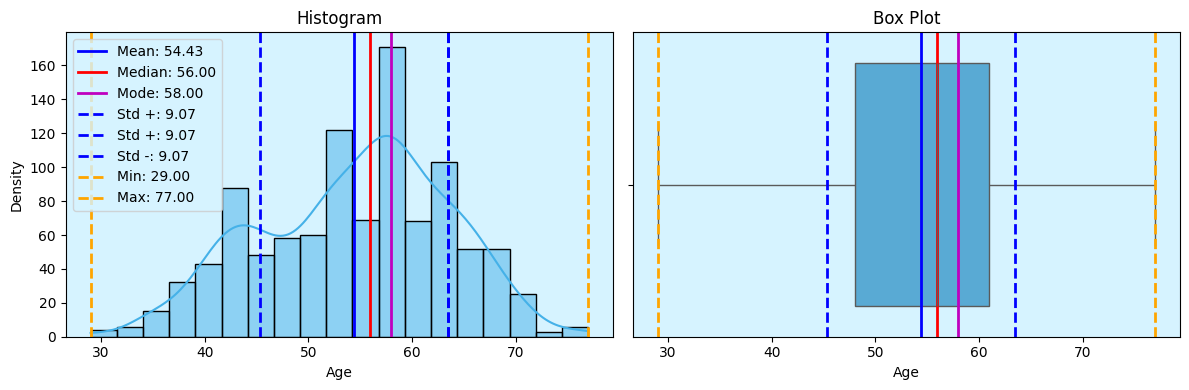

In [21]:
# Age
box_hist_plot("Age")

In [22]:
skewness_dist(heart_df_eda, "Age")

Skewness of the Age variable: -0.249
The distribution is left-skewed.


In [23]:
#Outliers of Age variable
age_outliers, age_lower_bound, age_upper_bound = find_outliers(heart_df_eda['Age'])

print("Lower Bound:", age_lower_bound)
print("Upper Bound:", age_upper_bound)
print("Outliers:", len(age_outliers))

Lower Bound: 28.5
Upper Bound: 80.5
Outliers: 0


In [24]:
outliers.update({"Age":len(age_outliers)})
#There are no outliers in Age variable.

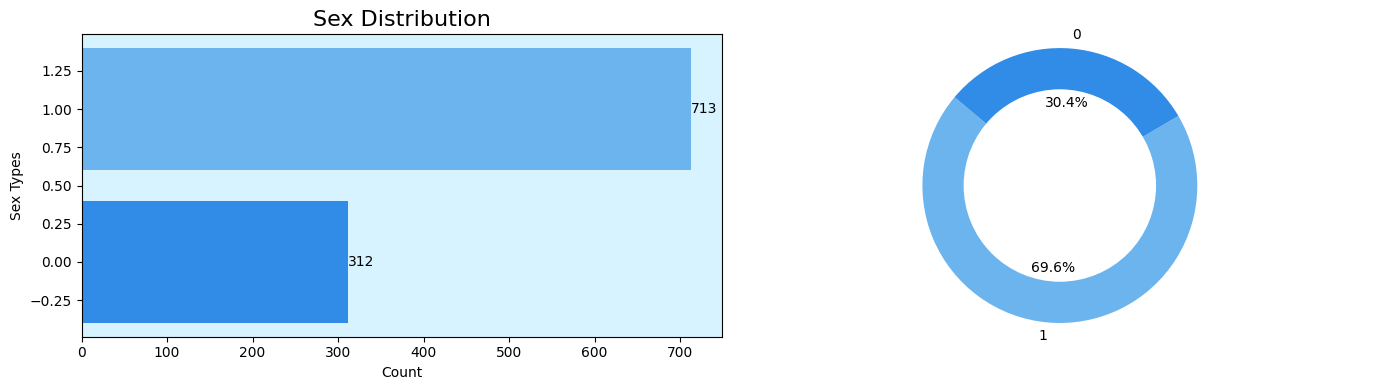

In [25]:
# Sex
bar_donut_chart("Sex")

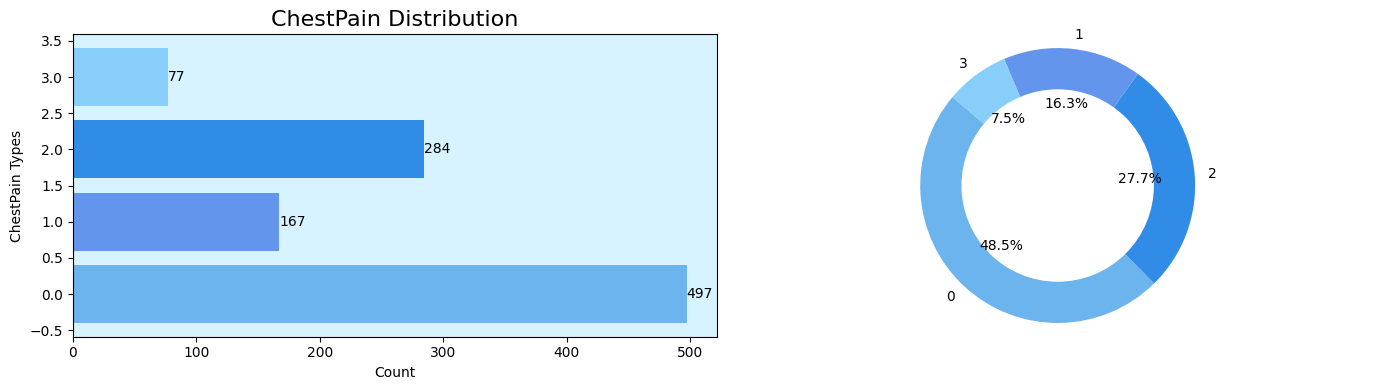

In [26]:
#Chest Pain
bar_donut_chart("ChestPain")

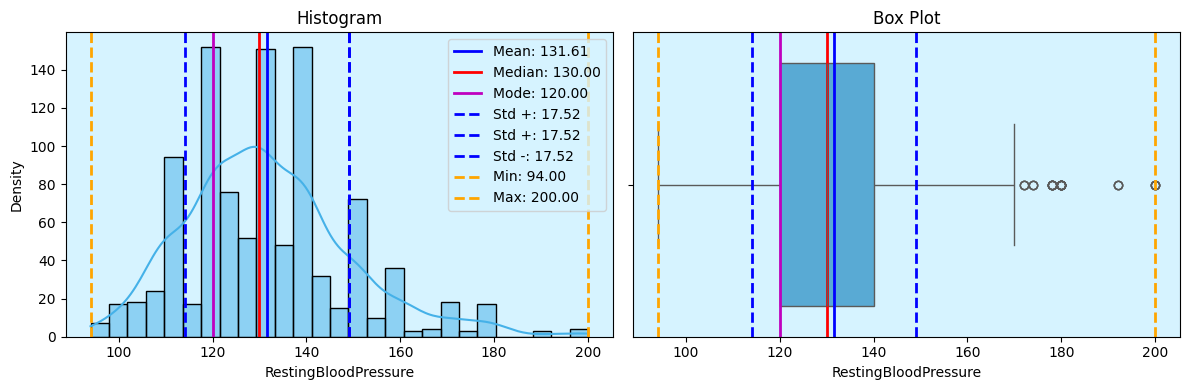

In [27]:
#Resting Blood Pressure
box_hist_plot("RestingBloodPressure")

In [28]:
skewness_dist(heart_df_eda, "RestingBloodPressure")

Skewness of the RestingBloodPressure variable: 0.740
The distribution is right-skewed.


In [29]:
#Outliers of Resting Blood Pressure column:
rbp_outliers, rbp_lower_bound, rbp_upper_bound = find_outliers(heart_df_eda['RestingBloodPressure'])

print("Lower Bound:", rbp_lower_bound)
print("Upper Bound:", rbp_upper_bound)
print("Outliers:", len(rbp_outliers))

Lower Bound: 90.0
Upper Bound: 170.0
Outliers: 30


In [30]:
outliers.update({"RestingBloodPressure":len(rbp_outliers)})

In [31]:
outliers

{'Age': 0, 'RestingBloodPressure': 30}

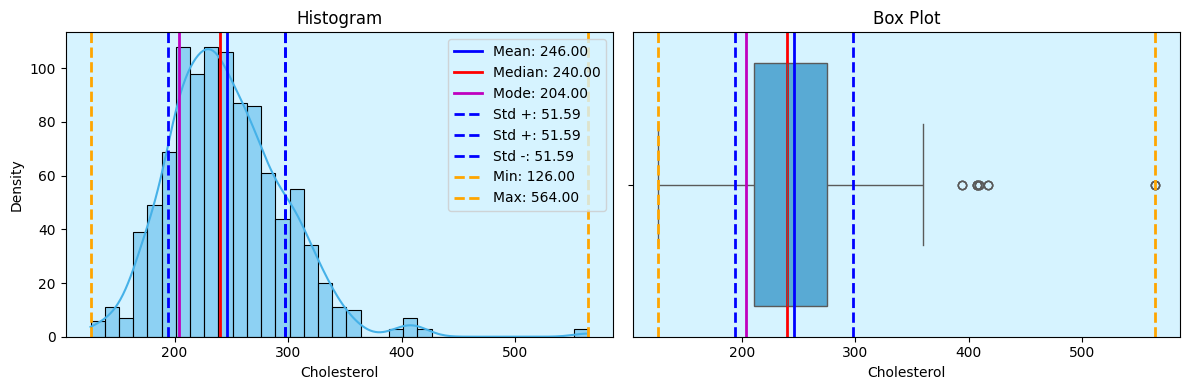

In [32]:
# Cholesterol
box_hist_plot("Cholesterol")

In [33]:
skewness_dist(heart_df_eda, "Cholesterol")

Skewness of the Cholesterol variable: 1.074
The distribution is right-skewed.


In [34]:
ch_outliers, ch_lower_bound, ch_upper_bound = find_outliers(heart_df_eda['Cholesterol'])

print("Lower Bound:", ch_lower_bound)
print("Upper Bound:", ch_upper_bound)
print("Outliers:", len(ch_outliers))

Lower Bound: 115.0
Upper Bound: 371.0
Outliers: 16


In [35]:
outliers.update({"Cholesterol":len(ch_outliers)})

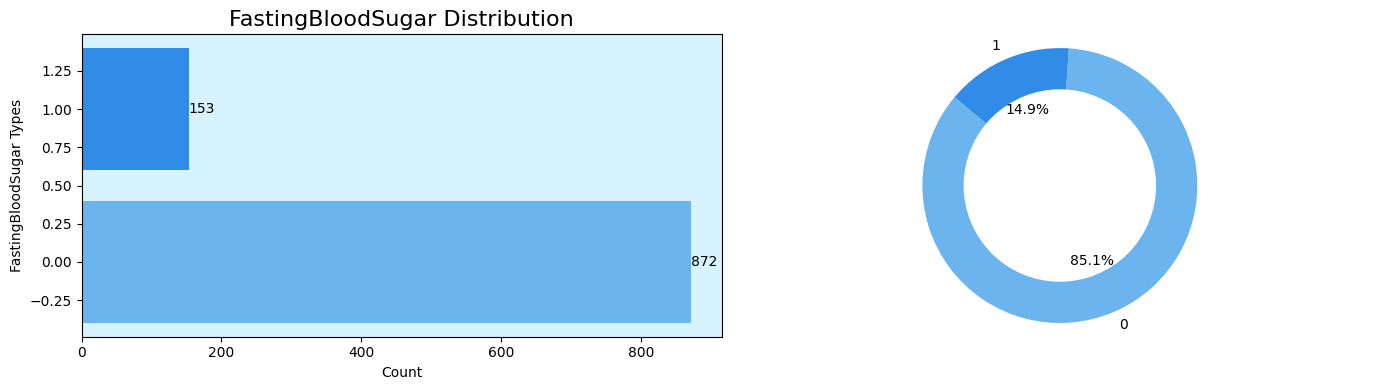

In [36]:
# Fasting Blood Sugar
bar_donut_chart("FastingBloodSugar")

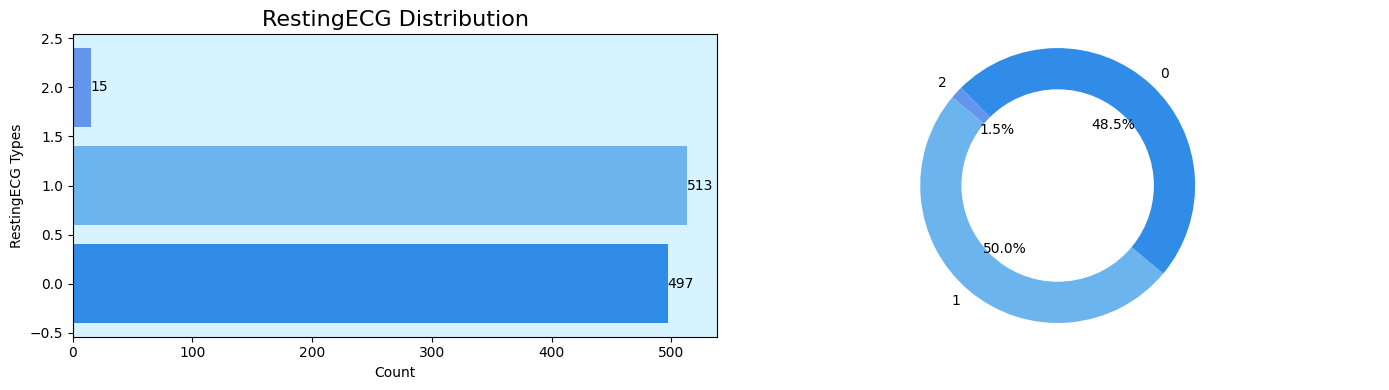

In [37]:
#Resting ECG
bar_donut_chart("RestingECG")

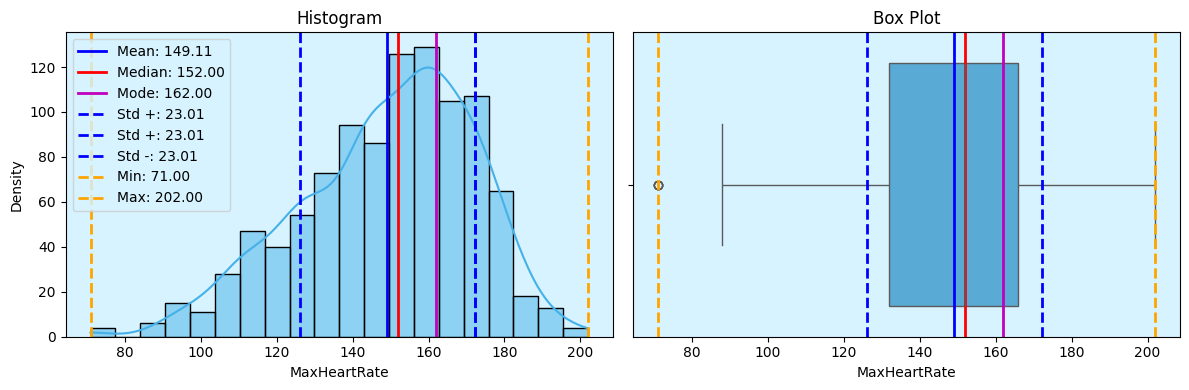

In [38]:
#Max Heart Rate
box_hist_plot("MaxHeartRate")

In [39]:
skewness_dist(heart_df_eda, "MaxHeartRate")

Skewness of the MaxHeartRate variable: -0.514
The distribution is left-skewed.


In [40]:
ecg_outliers, ecg_lower_bound, ecg_upper_bound = find_outliers(heart_df_eda['MaxHeartRate'])

print("Lower Bound:", ecg_lower_bound)
print("Upper Bound:", ecg_upper_bound)
print("Outliers':", len(ecg_outliers))

Lower Bound: 81.0
Upper Bound: 217.0
Outliers': 4


In [41]:
outliers.update({"MaxHeartRate":len(ecg_outliers)})

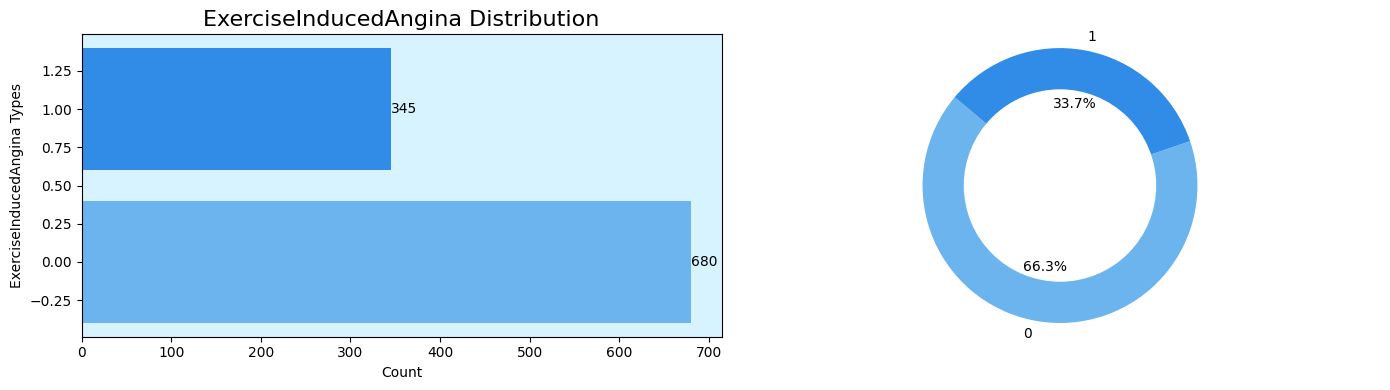

In [42]:
#Excercise Angina
bar_donut_chart("ExerciseInducedAngina")

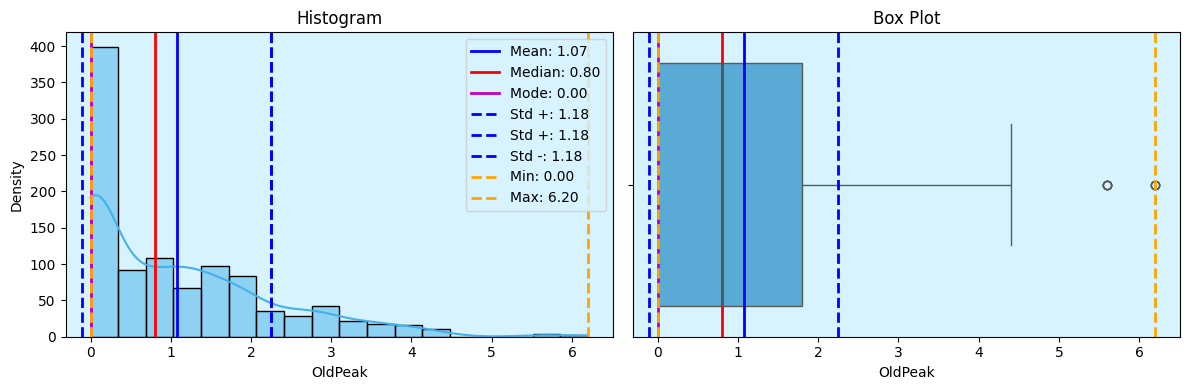

In [43]:
#Old Peak
box_hist_plot("OldPeak")

In [44]:
op_outliers, op_lower_bound, op_upper_bound = find_outliers(heart_df_eda['OldPeak'])

print("Lower Bound:", op_lower_bound)
print("Upper Bound:", op_upper_bound)
print("Outliers':", len(op_outliers))

Lower Bound: -2.7
Upper Bound: 4.5
Outliers': 7


In [45]:
outliers.update({"OldPeak":len(op_outliers)})

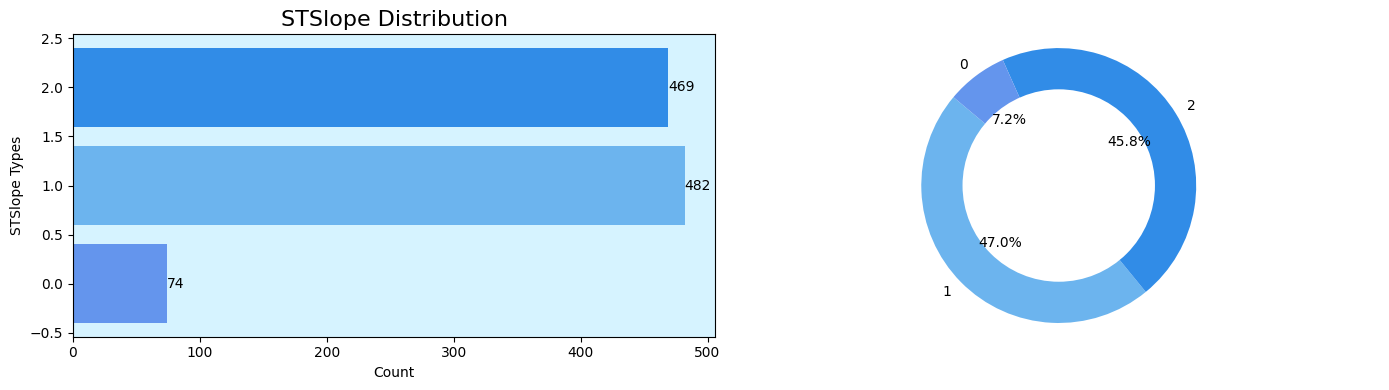

In [46]:
 #STSlope
bar_donut_chart("STSlope")

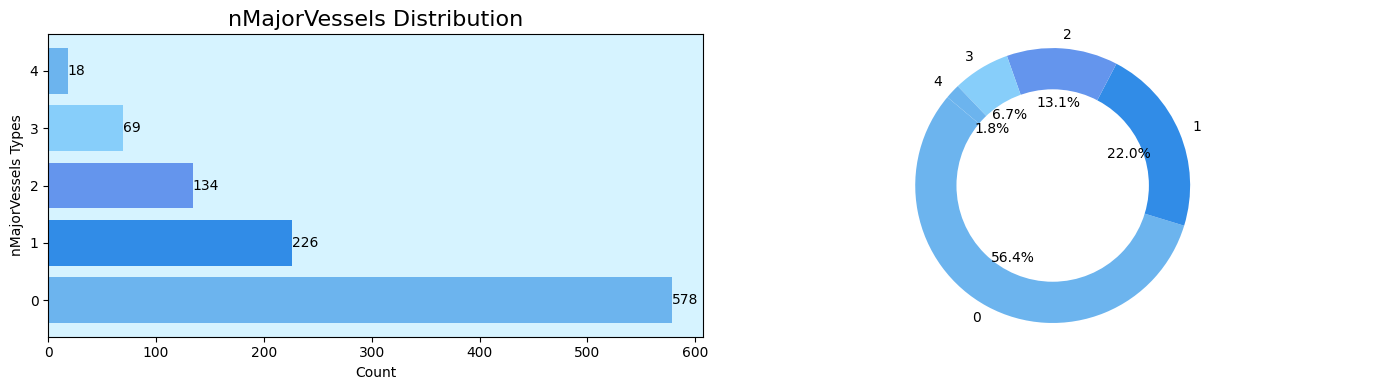

In [47]:
#n Major Vessels
bar_donut_chart("nMajorVessels")

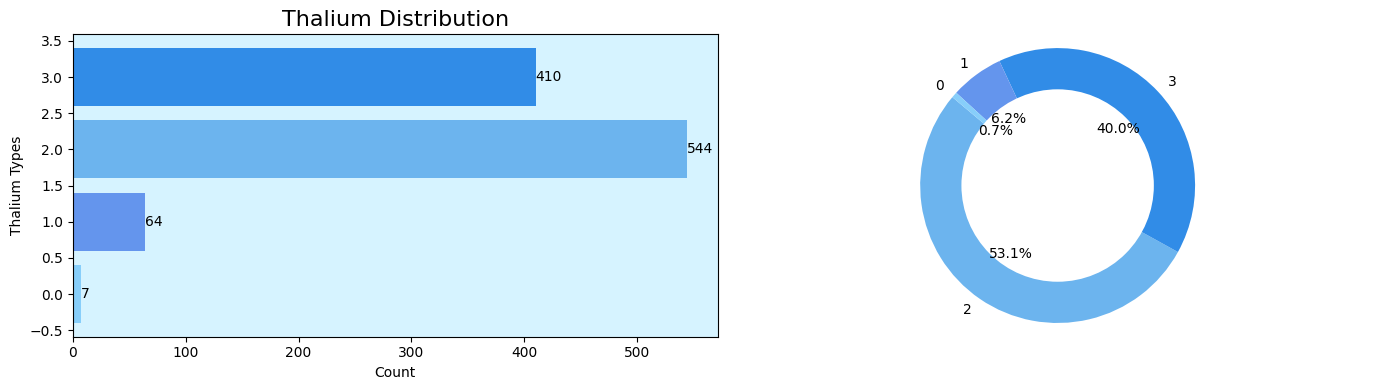

In [48]:
#Thalium
bar_donut_chart("Thalium")

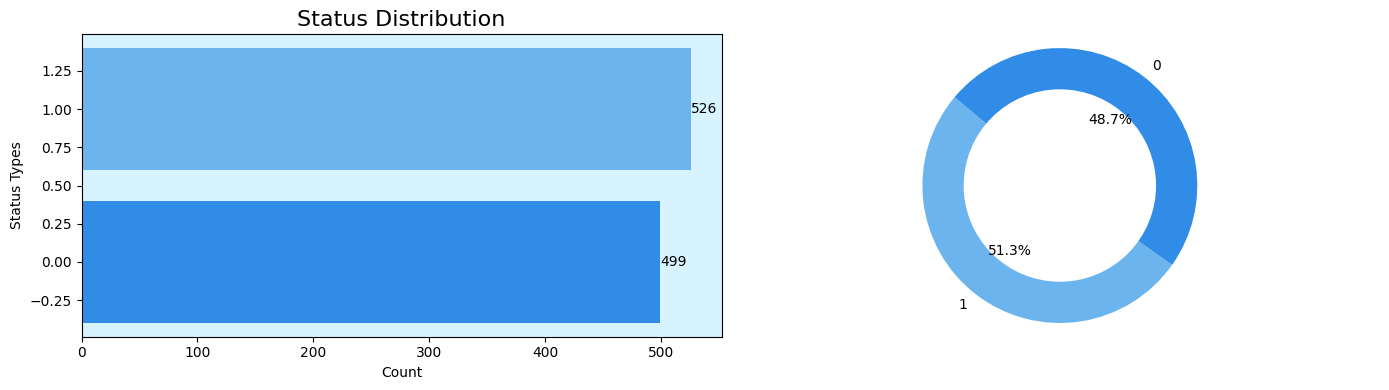

In [49]:
#Status
bar_donut_chart("Status")

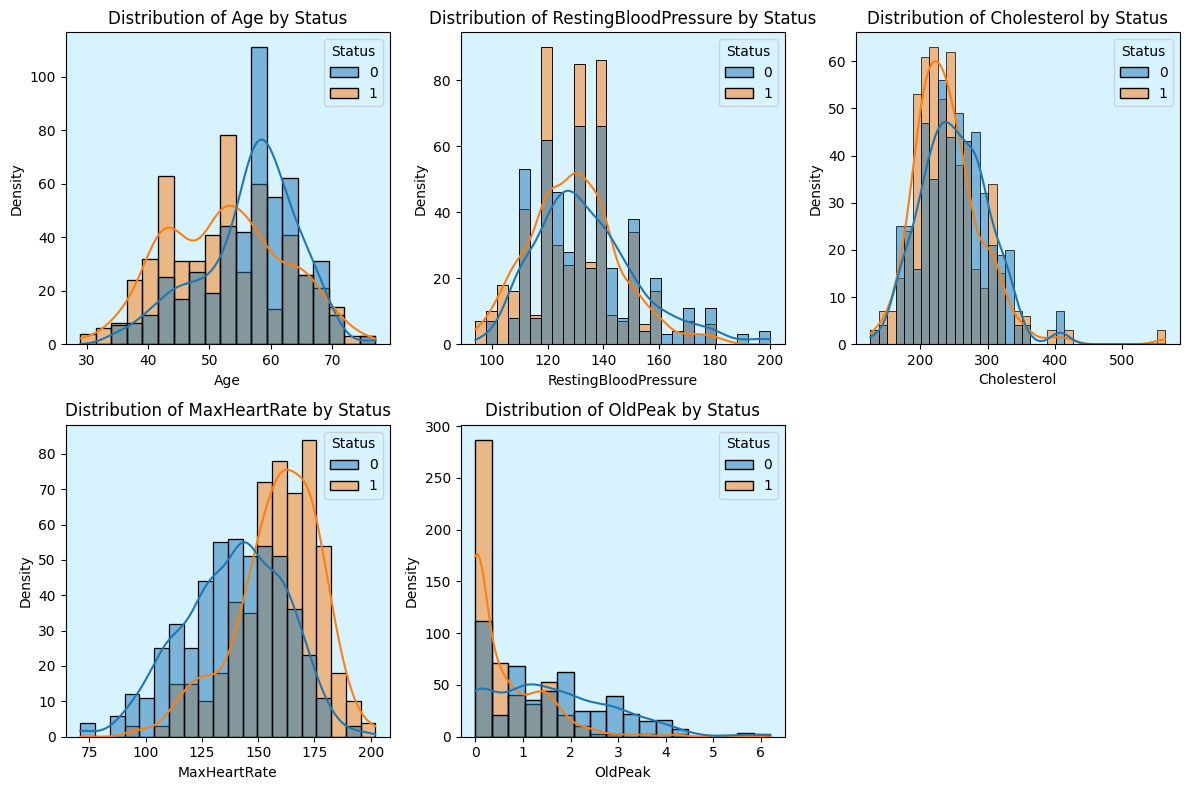

In [50]:
numerical_features = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=heart_df_eda, x=feature, hue='Status', kde=True, fill=True, ax=ax)
    ax.set_title(f'Distribution of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

axes[1, 2].remove()

plt.tight_layout()
plt.show()

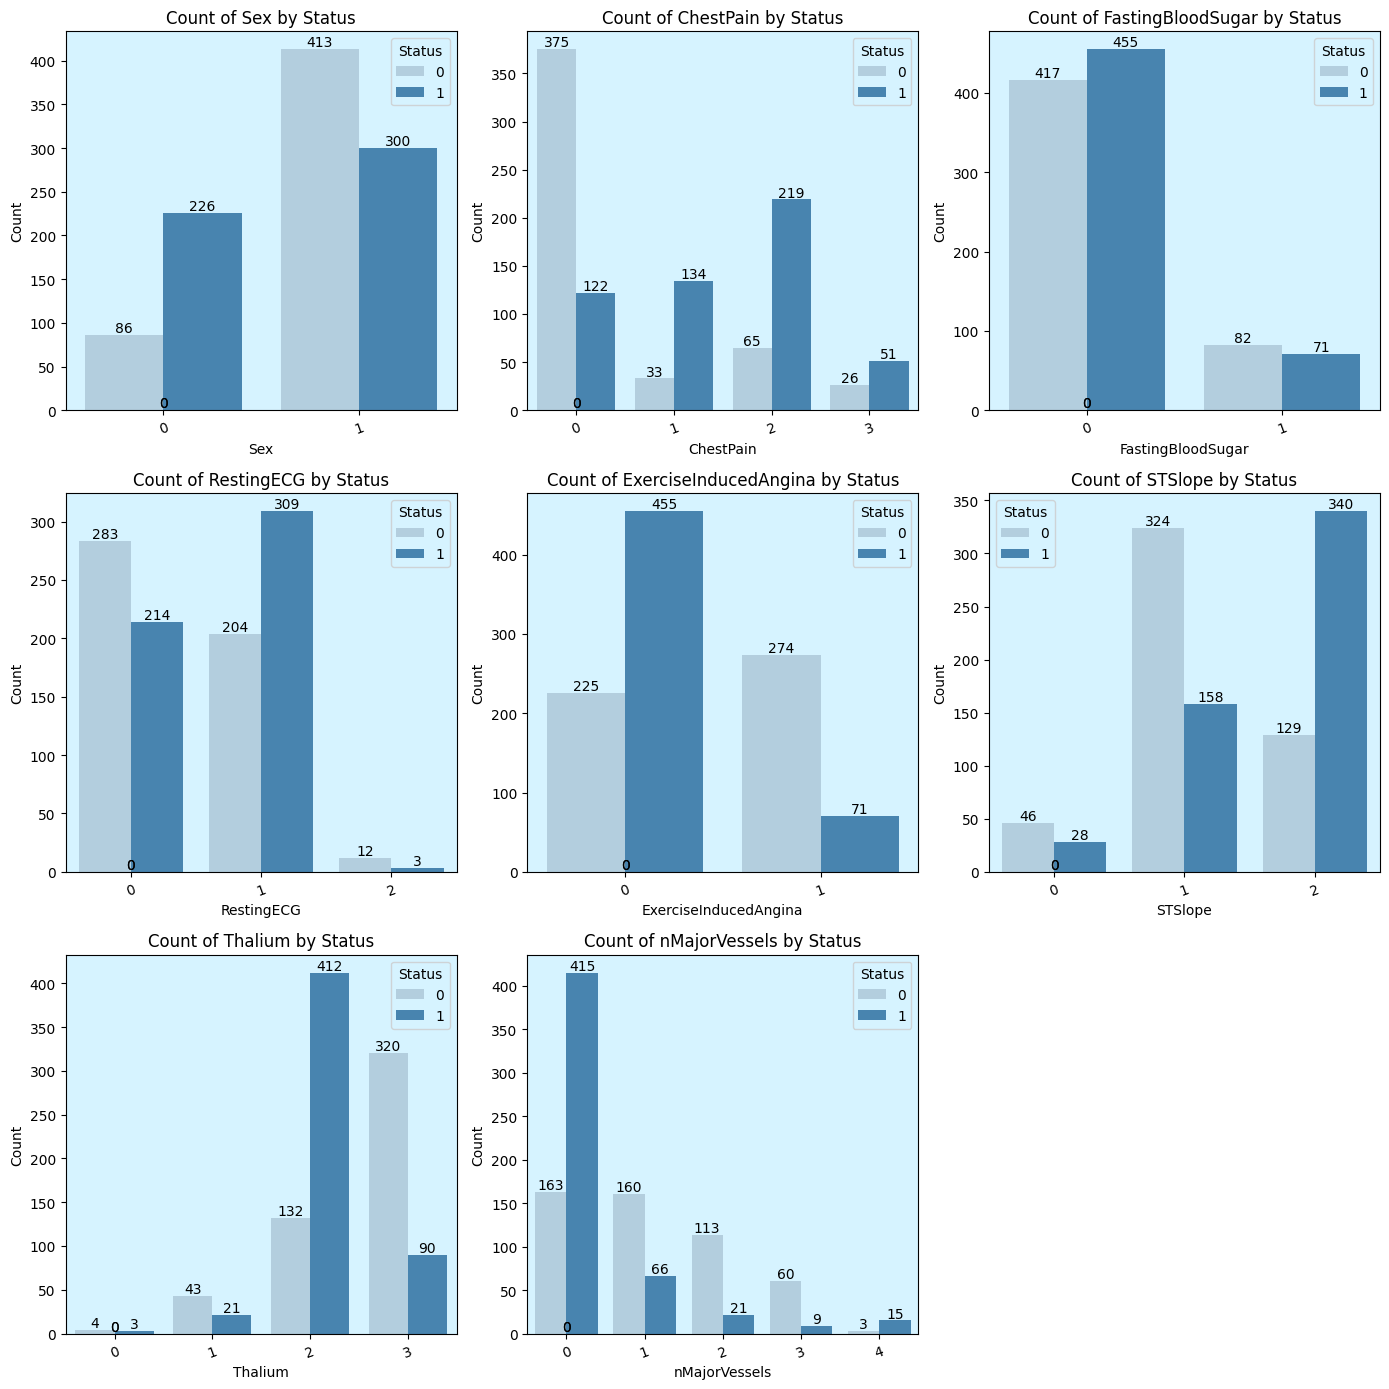

In [51]:
#Binary & Categorical Variables
categorical_features = ['Sex', 'ChestPain', 'FastingBloodSugar', 'RestingECG', 'ExerciseInducedAngina', 'STSlope', 'Thalium', 'nMajorVessels']

num_features = len(categorical_features)
num_rows = (num_features - 1) // 3 + 1
num_cols = min(num_features, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 14))

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sns.countplot(data=heart_df_eda, x=feature, hue='Status', ax=ax, palette='Blues')
    ax.set_title(f'Count of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=20)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points',
                    color='black')

for i in range(num_rows):
    for j in range(num_cols):
        if i * 3 + j >= num_features:
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

# Step 5 - Preprocessing

Step 5.1 | Handling Outliers

In [52]:
outliers_df = pd.DataFrame(list(outliers.items()), columns=['Variable', 'Outliers'])
outliers_df

,Variable,Outliers
0,Age,0
1,RestingBloodPressure,30
2,Cholesterol,16
3,MaxHeartRate,4
4,OldPeak,7


In [53]:
def box_cox_transform(heart_df):
    transformed_df = heart_df.copy()
    features_to_transform = ["Age", "RestingBloodPressure", "Cholesterol", "MaxHeartRate", "OldPeak"]

    for feature in features_to_transform:
        if np.any(heart_df[feature] <= 0):
            min_value = abs(heart_df[feature].min()) + 1
            heart_df[feature] += min_value
        transformed_feature, lambda_value = boxcox(heart_df[feature])
        transformed_df[feature] = transformed_feature

    return transformed_df

In [54]:
def plot_transform(heart_df, transformed_df, variable):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

    sns.boxplot(x=heart_df[variable], ax=axes[0, 0], color='#00308F')
    axes[0, 0].set_title(f"Original {variable}")

    sns.boxplot(x=transformed_df[variable], ax=axes[0, 1], color='#7CB9E8')
    axes[0, 1].set_title(f"Transformed {variable}")

    sns.histplot(heart_df[variable], ax=axes[1, 0], kde=True, color='#00308F')
    axes[1, 0].set_title(f"Original {variable} Distribution")

    sns.histplot(transformed_df[variable], ax=axes[1, 1], kde=True, color='#7CB9E8')
    axes[1, 1].set_title(f"Transformed {variable} Distribution")

    plt.tight_layout()
    plt.show()

In [55]:
transformed_df = box_cox_transform(heart_df)

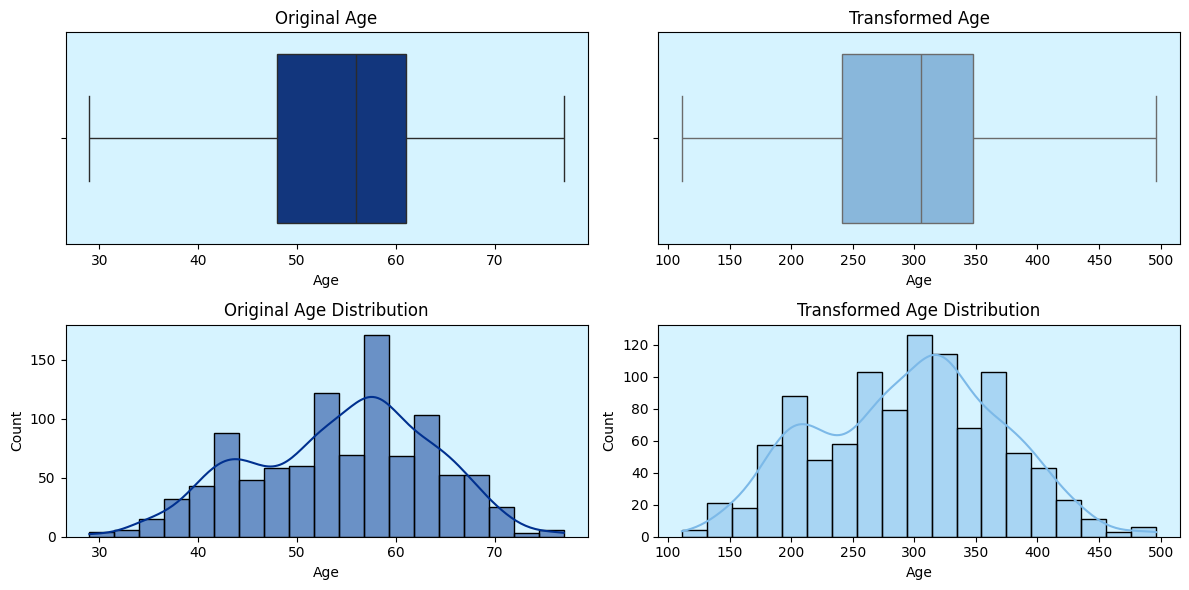

In [56]:
# Age variable
plot_transform(heart_df, transformed_df, 'Age')

In [57]:
skewness_dist(heart_df_eda, "Age")

Skewness of the Age variable: -0.249
The distribution is left-skewed.


In [58]:
skewness_dist(transformed_df, "Age")

Skewness of the Age variable: -0.058
The distribution is left-skewed.


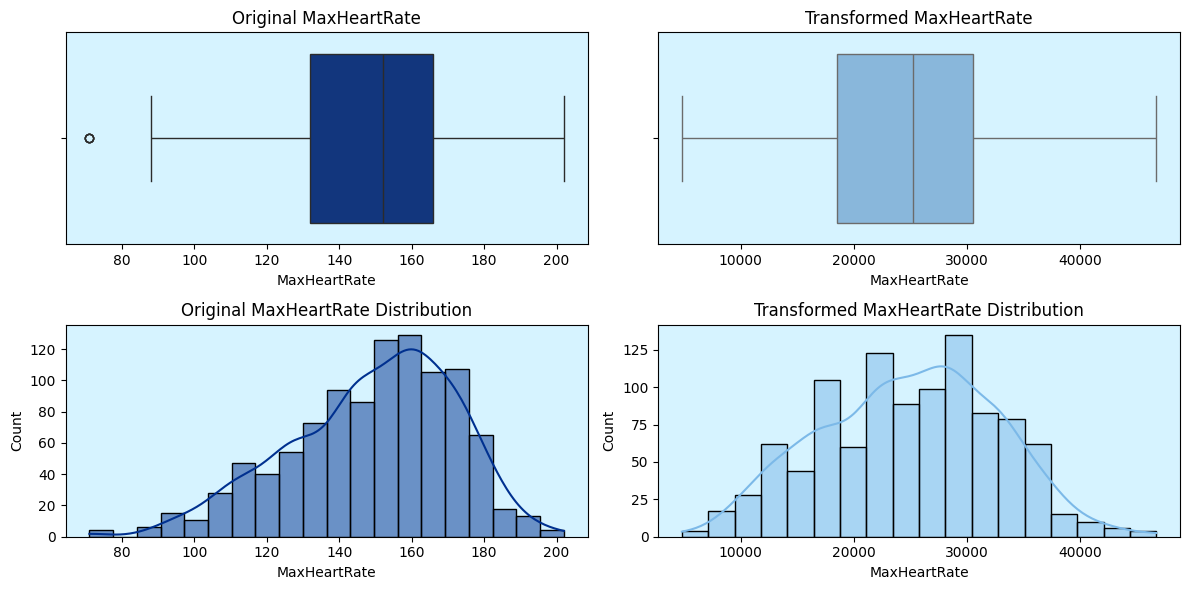

In [59]:
#Max Heart Rate variable
plot_transform(heart_df, transformed_df, 'MaxHeartRate')

In [60]:
skewness_dist(heart_df_eda, "MaxHeartRate")

Skewness of the MaxHeartRate variable: -0.514
The distribution is left-skewed.


In [61]:
skewness_dist(transformed_df, "MaxHeartRate")

Skewness of the MaxHeartRate variable: -0.072
The distribution is left-skewed.


In [62]:
outliers_df["Variable"][3], outliers_df["Outliers"][3]

('MaxHeartRate', 4)

In [63]:
ecg_outliers_bc, ecg_lower_bound_bc, ecg_upper_bound_bc = find_outliers(transformed_df['MaxHeartRate'])

print("Lower Bound:", ecg_lower_bound_bc)
print("Upper Bound:", ecg_upper_bound_bc)
print("Outliers':", len(ecg_outliers_bc))

Lower Bound: 604.4843830524696
Upper Bound: 48438.67779463741
Outliers': 0


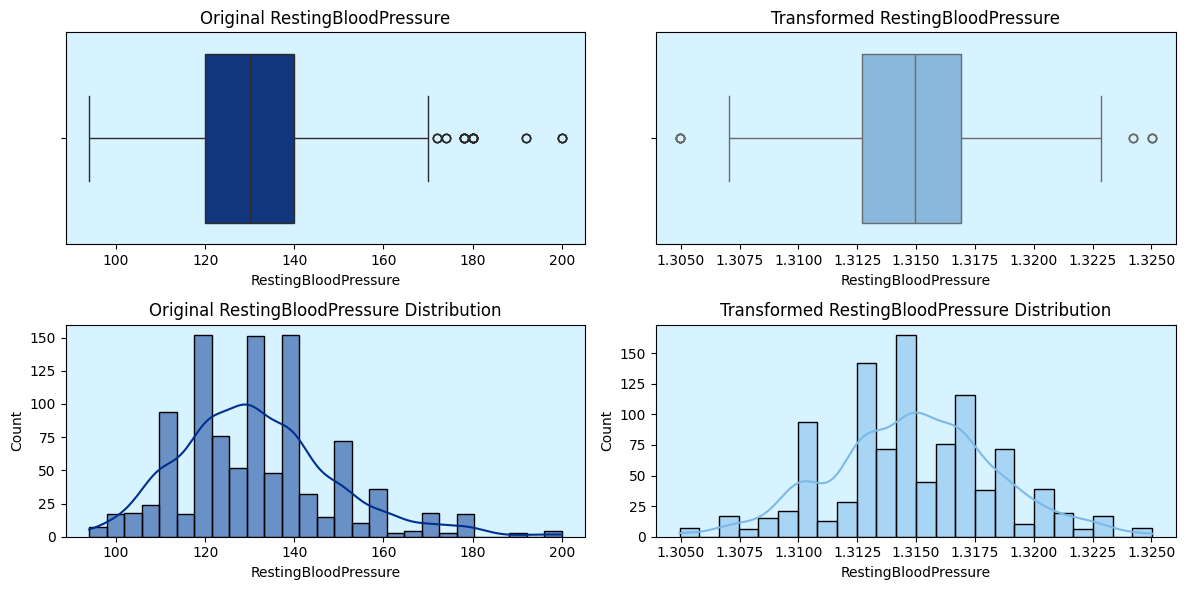

In [64]:
 #Resting Blood Pressure variable
plot_transform(heart_df, transformed_df, 'RestingBloodPressure')

In [65]:
skewness_dist(heart_df_eda, "RestingBloodPressure")

Skewness of the RestingBloodPressure variable: 0.740
The distribution is right-skewed.


In [66]:
skewness_dist(transformed_df, "RestingBloodPressure")

Skewness of the RestingBloodPressure variable: -0.002
The distribution is left-skewed.


In [67]:
outliers_df["Variable"][1], outliers_df["Outliers"][1]

('RestingBloodPressure', 30)

In [68]:
rbp_outliers_bc, rbp_lower_bound_bc, rbp_upper_bound_bc = find_outliers(transformed_df['RestingBloodPressure'])

print("Lower Bound:", rbp_lower_bound_bc)
print("Upper Bound:", rbp_upper_bound_bc)
print("Outliers:", len(rbp_outliers_bc))

Lower Bound: 1.3063728315769434
Upper Bound: 1.323256981162182
Outliers: 14


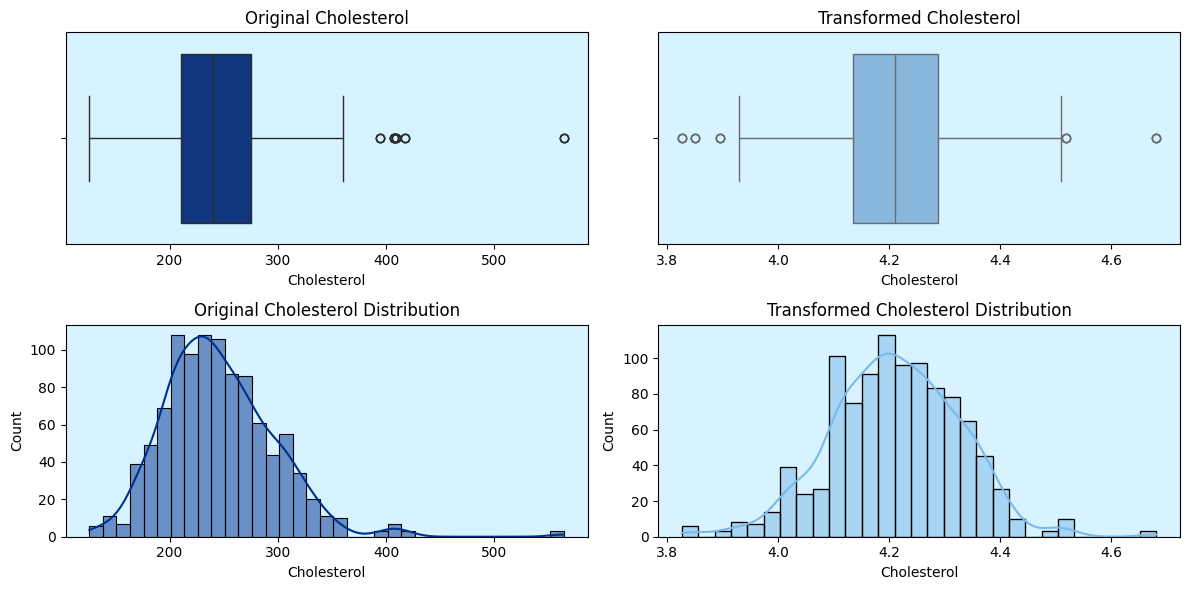

In [69]:
#Cholesterol variable
plot_transform(heart_df, transformed_df, 'Cholesterol')

In [70]:
transformed_df = box_cox_transform(heart_df)

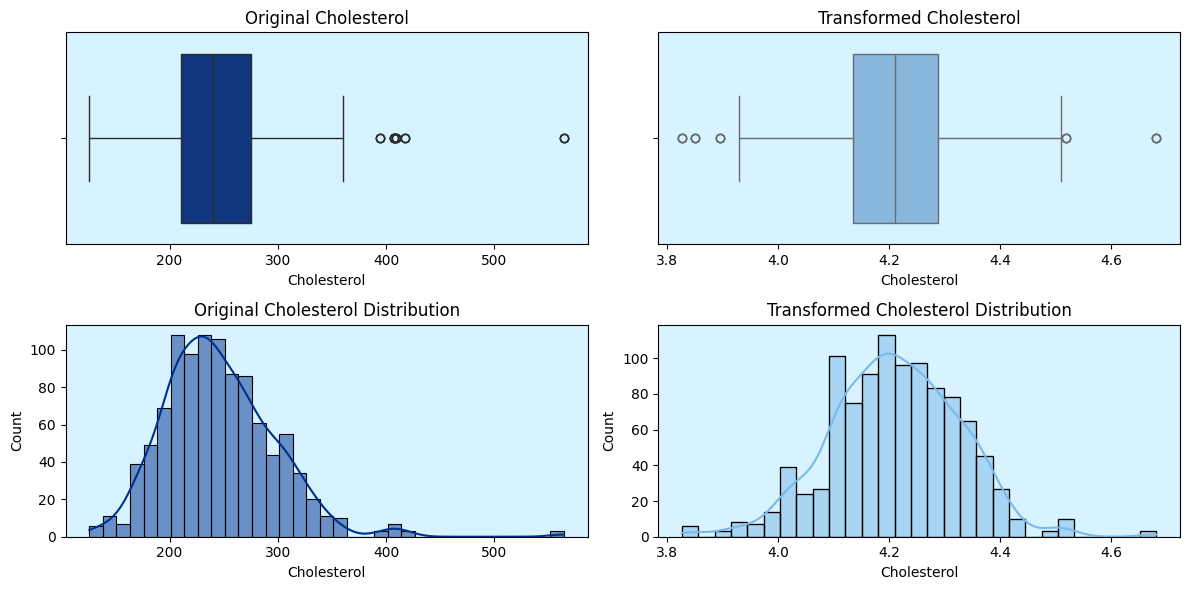

In [71]:
plot_transform(heart_df, transformed_df, 'Cholesterol')

In [72]:
skewness_dist(heart_df_eda, "Cholesterol")

Skewness of the Cholesterol variable: 1.074
The distribution is right-skewed.


In [73]:
skewness_dist(transformed_df, "Cholesterol")

Skewness of the Cholesterol variable: -0.005
The distribution is left-skewed.


In [74]:
ch_outliers_bc, ch_lower_bound_bc, ch_upper_bound_bc = find_outliers(transformed_df['Cholesterol'])

print("Lower Bound:", ch_lower_bound_bc)
print("Upper Bound:", ch_upper_bound_bc)
print("Outliers:", len(ch_outliers_bc))

Lower Bound: 3.907125040904249
Upper Bound: 4.51657103230375
Outliers: 15


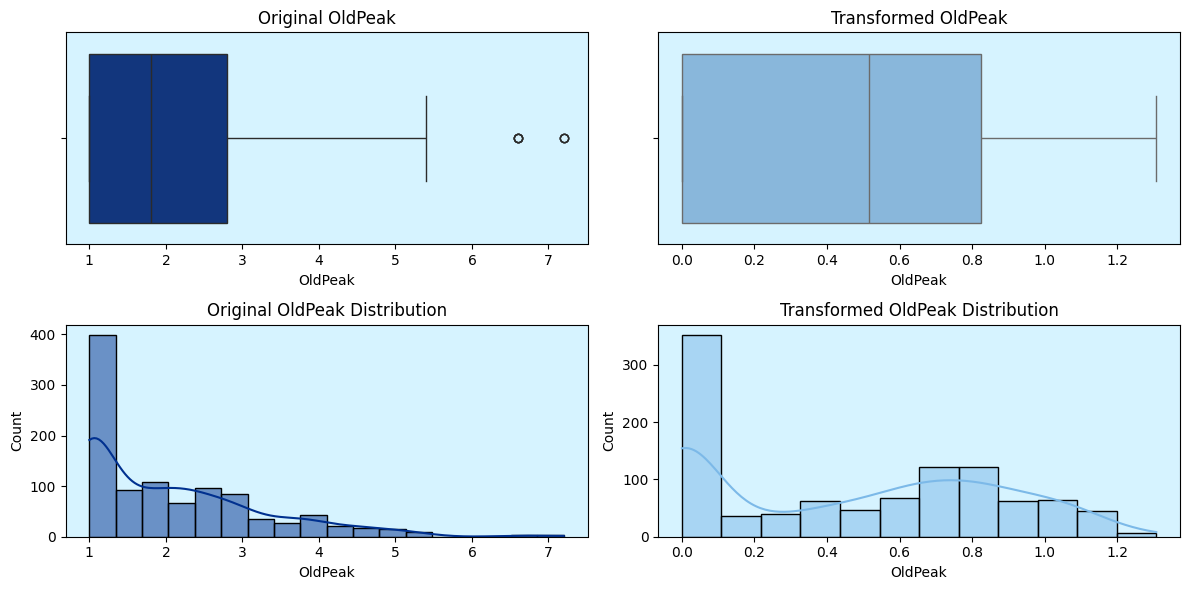

In [75]:
# Old Peak variable
plot_transform(heart_df, transformed_df, 'OldPeak')

In [76]:
skewness_dist(heart_df_eda, "OldPeak")
skewness_dist(transformed_df, "OldPeak")

Skewness of the OldPeak variable: 1.211
The distribution is right-skewed.
Skewness of the OldPeak variable: 0.111
The distribution is right-skewed.


In [77]:
op_outliers_bc, op_lower_bound_bc, op_upper_bound_bc = find_outliers(transformed_df['OldPeak'])

print("Lower Bound:", op_lower_bound_bc)
print("Upper Bound:", op_upper_bound_bc)
print("Outliers':", len(op_outliers_bc))

Lower Bound: -1.235637522919693
Upper Bound: 2.0593958715328218
Outliers': 0


In [78]:
transformed = transformed_df.copy()

In [79]:
heart_df_copy = heart_df.copy()

Step 5.2 | Missing Values

In [80]:
heart_df.isnull().sum()

,0
Age,0
Sex,0
ChestPain,0
RestingBloodPressure,0
Cholesterol,0
FastingBloodSugar,0
RestingECG,0
MaxHeartRate,0
ExerciseInducedAngina,0
OldPeak,0


Step 5.3 | Duplicated Values

In [81]:
duplicated_rows = heart_df.duplicated()
heart_df[duplicated_rows]

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
15,34,0,1,118,210,0,1,192,0,1.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,2.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,1.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,6.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,1.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,1.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,3.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,2.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,1.0,2,0,2,1


In [82]:
print(heart_df.index)

RangeIndex(start=0, stop=1025, step=1)


In [83]:
heart_df.drop_duplicates(inplace=True)

# Step 6 | Feature Engineering

Step 6.1 | One-Hot Encoding

In [84]:
features_to_encode = ["ChestPain", "RestingECG", "STSlope", "Thalium"]

In [85]:
heart_df = pd.get_dummies(heart_df, columns=features_to_encode)

In [86]:
transformed = pd.get_dummies(transformed, columns=features_to_encode)

In [87]:
bool_columns = transformed.select_dtypes(include=bool).columns
transformed[bool_columns] = transformed[bool_columns].astype("int64")

In [88]:
bool_columns2 = heart_df.select_dtypes(include=bool).columns
heart_df[bool_columns2] = heart_df[bool_columns2].astype("int64")

Step 6.2 | Label Encoding

In [89]:
label_encoder = LabelEncoder()

In [90]:
features_to_encode = ['Sex', 'FastingBloodSugar', 'ExerciseInducedAngina', 'Status']

In [91]:
for feature in features_to_encode:
    transformed[feature] = label_encoder.fit_transform(transformed[feature])

In [92]:
for feature in features_to_encode:
    heart_df[feature] = label_encoder.fit_transform(heart_df[feature])

In [93]:
transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1025 non-null   float64
 1   Sex                    1025 non-null   int64  
 2   RestingBloodPressure   1025 non-null   float64
 3   Cholesterol            1025 non-null   float64
 4   FastingBloodSugar      1025 non-null   int64  
 5   MaxHeartRate           1025 non-null   float64
 6   ExerciseInducedAngina  1025 non-null   int64  
 7   OldPeak                1025 non-null   float64
 8   nMajorVessels          1025 non-null   int64  
 9   Status                 1025 non-null   int64  
 10  ChestPain_0            1025 non-null   int64  
 11  ChestPain_1            1025 non-null   int64  
 12  ChestPain_2            1025 non-null   int64  
 13  ChestPain_3            1025 non-null   int64  
 14  RestingECG_0           1025 non-null   int64  
 15  Rest

# Step 7 - Correlation Analysis

In [94]:
df_corr = heart_df.copy()




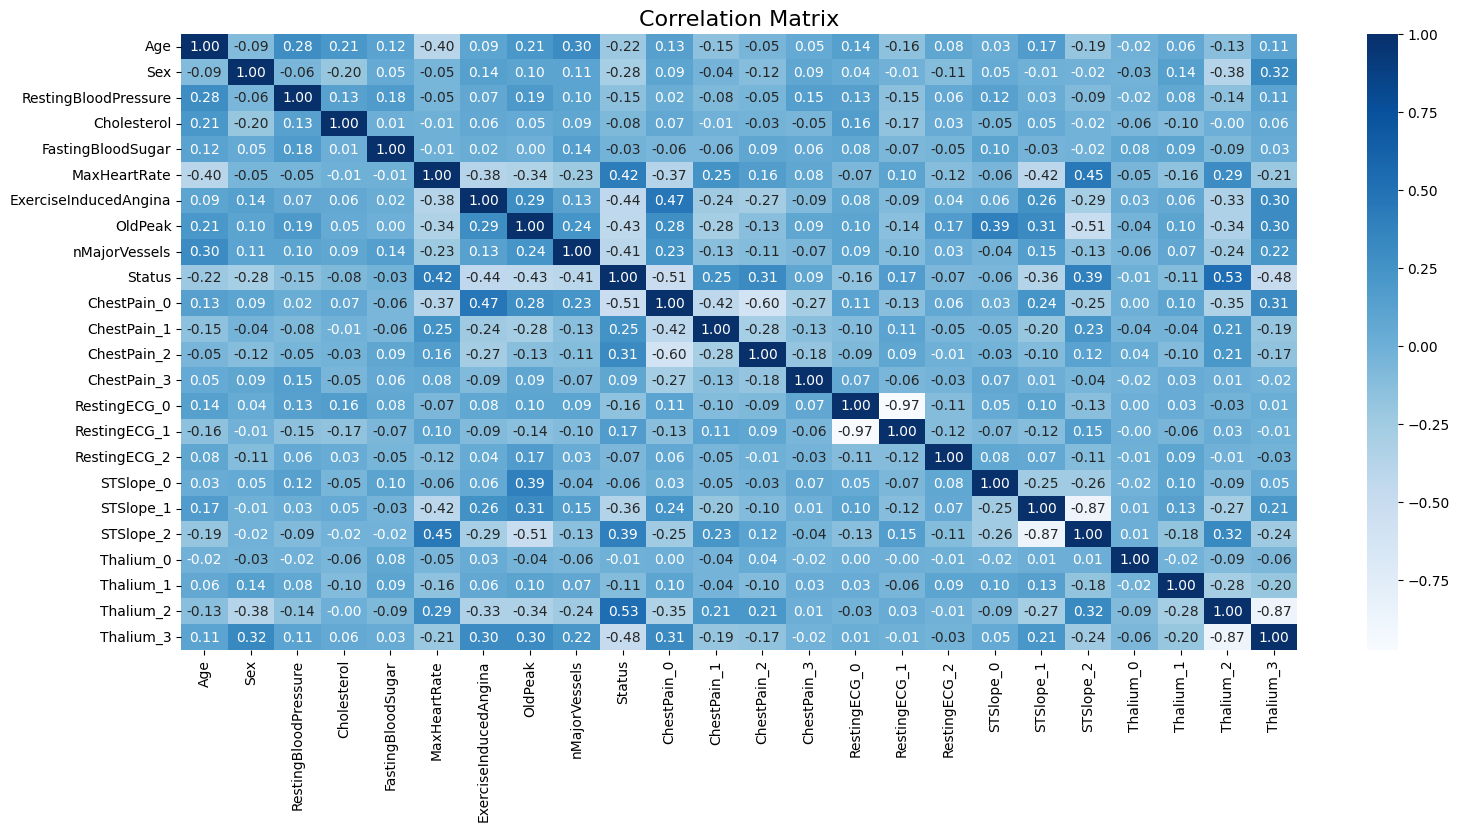

In [95]:
df_correlation = df_corr.corr()

plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(df_correlation, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [96]:
columns_to_drop = ["ChestPain", "RestingECG", "STSlope", "Thalium"]

In [97]:
heart_df2 = heart_df.copy()

In [98]:
transformed = heart_df.copy()


In [99]:
heart_df2.drop(columns=[col for col in columns_to_drop if col in heart_df2.columns], axis=1, inplace=True)
transformed.drop(columns=[col for col in columns_to_drop if col in transformed.columns], axis=1, inplace=True)

In [100]:
df3_no_transformed = heart_df2.copy()
heart_df3 = transformed.copy()

In [101]:
heart_df3.head()

,Age,Sex,RestingBloodPressure,Cholesterol,FastingBloodSugar,MaxHeartRate,ExerciseInducedAngina,OldPeak,nMajorVessels,Status,...,RestingECG_0,RestingECG_1,RestingECG_2,STSlope_0,STSlope_1,STSlope_2,Thalium_0,Thalium_1,Thalium_2,Thalium_3
0,52,1,125,212,0,168,0,2.0,2,0,...,0,1,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,4.1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,3.6,0,0,...,0,1,0,1,0,0,0,0,0,1
3,61,1,148,203,0,161,0,1.0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,2.9,3,0,...,0,1,0,0,1,0,0,0,1,0


# Step 8 | Feature Scaling

In [102]:
features_to_scale = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak', 'nMajorVessels']

scaler = StandardScaler()

scaler.fit(transformed[features_to_scale])

transformed_scaled = scaler.transform(transformed[features_to_scale])
transformed[features_to_scale] = transformed_scaled

In [103]:
transformed[features_to_scale] = scaler.fit_transform(transformed[features_to_scale])

In [104]:
heart_df2[features_to_scale] = scaler.fit_transform(heart_df[features_to_scale])

# Step 9 | Modeling

In [105]:
def customize_split(heart_df):
    df_shuffled = heart_df.sample(frac=1, random_state=42)

    train_size = 0.7
    test_size = 0.3

    num_samples = len(df_shuffled)
    num_samples_train = int(num_samples * train_size)
    num_samples_test = num_samples - num_samples_train

    train_df = df_shuffled.head(num_samples_train)

    num_samples_per_class_test = int(num_samples_test / 2)
    test_df = pd.concat([df_shuffled[df_shuffled['Status'] == 0].tail(num_samples_per_class_test),
                         df_shuffled[df_shuffled['Status'] == 1].tail(num_samples_per_class_test)])

    X_train = train_df.drop(columns=['Status'])
    y_train = train_df['Status'].values

    X_test = test_df.drop(columns=['Status'])
    y_test = test_df['Status'].values

    print(test_df['Status'].value_counts())

    percent_train = (len(train_df) / len(df_shuffled)) * 100
    percent_test = (len(test_df) / len(df_shuffled)) * 100

    return X_train, X_test, y_train, y_test, percent_train, percent_test

In [106]:
df2_X_train, df2_X_test, df2_y_train, df2_y_test, ptrain_df2, ptest_df2 = customize_split(heart_df2)
transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, ptrain_df2, ptest_df2 = customize_split(transformed)

Status
0    45
1    45
Name: count, dtype: int64
Status
0    45
1    45
Name: count, dtype: int64


In [107]:
print(f"Percentage of samples for training: {ptrain_df2:.2f}%")
print(f"Percentage of samples for testing: {ptest_df2:.2f}%")

Percentage of samples for training: 69.87%
Percentage of samples for testing: 29.80%


In [108]:
(pd.DataFrame(df2_y_train)).value_counts()

,count
0,
1,112
0,99


In [109]:
df3_X_train, df3_X_test, df3_y_train, df3_y_test, ptrain_df3, ptest_df3 = customize_split(heart_df3)

Status
0    45
1    45
Name: count, dtype: int64


Logistic Regression

Logistic Regression Confusion Matrix:
[[35 10]
 [ 4 41]]
Logistic Regression Accuracy: 0.8444444444444444
Logistic Regression Precision: 0.803921568627451
Logistic Regression Recall: 0.9111111111111111
Logistic Regression F1-score: 0.8541666666666666


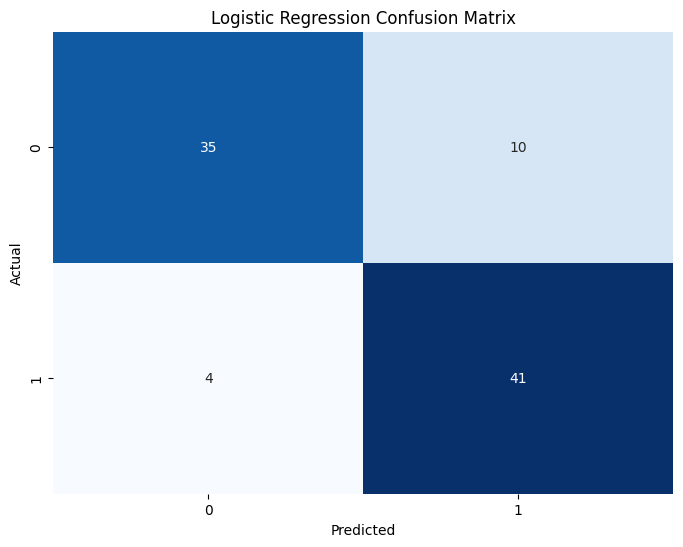

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Initialize the classifier (Logistic Regression)
clf_lr = LogisticRegression(random_state=42)

# Train the classifier
clf_lr.fit(df3_X_train, df3_y_train)

# Make predictions on the test set
y_pred_lr = clf_lr.predict(df3_X_test)

# Generate confusion matrix for Logistic Regression
cm_lr = confusion_matrix(df3_y_test, y_pred_lr)

# Calculate accuracy metrics for Logistic Regression
accuracy_lr = accuracy_score(df3_y_test, y_pred_lr)
precision_lr = precision_score(df3_y_test, y_pred_lr)
recall_lr = recall_score(df3_y_test, y_pred_lr)
f1_lr = f1_score(df3_y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:")
print(cm_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression Recall:", recall_lr)
print("Logistic Regression F1-score:", f1_lr)

# Plot confusion matrix heatmap for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Decision Tree

Decision Tree Confusion Matrix:
[[30 15]
 [11 34]]
Decision Tree Accuracy: 0.7111111111111111
Decision Tree Precision: 0.6938775510204082
Decision Tree Recall: 0.7555555555555555
Decision Tree F1-score: 0.723404255319149


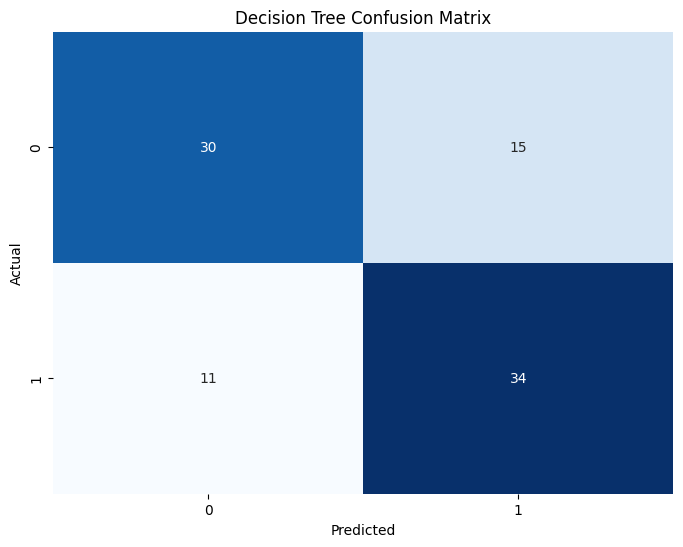

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
clf_decisiontree = DecisionTreeClassifier(random_state=42)
# Train the Decision Tree classifier
clf_decisiontree.fit(df3_X_train, df3_y_train)
# Make predictions on the test set using Decision Tree
y_pred_decisiontree = clf_decisiontree.predict(df3_X_test)
# Generate confusion matrix for Decision Tree
cm_decisiontree = confusion_matrix(df3_y_test, y_pred_decisiontree)
# Calculate accuracy metrics for Decision Tree
accuracy_decisiontree = accuracy_score(df3_y_test, y_pred_decisiontree)
precision_decisiontree = precision_score(df3_y_test, y_pred_decisiontree)
recall_decisiontree = recall_score(df3_y_test, y_pred_decisiontree)
f1_decisiontree = f1_score(df3_y_test, y_pred_decisiontree)
print("Decision Tree Confusion Matrix:")
print(cm_decisiontree)
print("Decision Tree Accuracy:", accuracy_decisiontree)
print("Decision Tree Precision:", precision_decisiontree)
print("Decision Tree Recall:", recall_decisiontree)
print("Decision Tree F1-score:", f1_decisiontree)
# Plot confusion matrix heatmap for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_decisiontree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

RandomForest

Random Forest Confusion Matrix:
[[35 10]
 [ 8 37]]
Random Forest Accuracy: 0.8
Random Forest Precision: 0.7872340425531915
Random Forest Recall: 0.8222222222222222
Random Forest F1-score: 0.8043478260869565


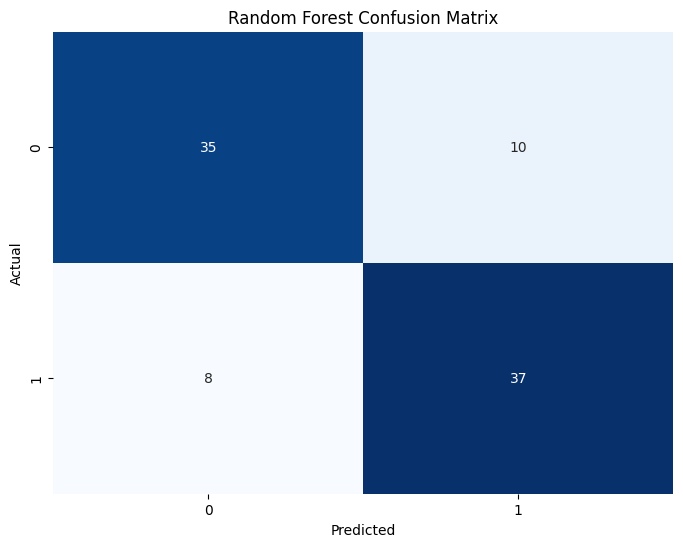

In [112]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier (Random Forest Classifier)
clf_rf = RandomForestClassifier(random_state=42)

# Train the classifier
clf_rf.fit(df3_X_train, df3_y_train)

# Make predictions on the test set
y_pred_rf = clf_rf.predict(df3_X_test)

# Generate confusion matrix for Random Forest
cm_rf = confusion_matrix(df3_y_test, y_pred_rf)

# Calculate accuracy metrics for Random Forest
accuracy_rf = accuracy_score(df3_y_test, y_pred_rf)
precision_rf = precision_score(df3_y_test, y_pred_rf)
recall_rf = recall_score(df3_y_test, y_pred_rf)
f1_rf = f1_score(df3_y_test, y_pred_rf)

print("Random Forest Confusion Matrix:")
print(cm_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1-score:", f1_rf)

# Plot confusion matrix heatmap for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

SVM with RBF kernel

SVM with RBF Kernel Confusion Matrix:
[[21 24]
 [ 6 39]]
SVM with RBF Kernel Accuracy: 0.6666666666666666
SVM with RBF Kernel Precision: 0.6190476190476191
SVM with RBF Kernel Recall: 0.8666666666666667
SVM with RBF Kernel F1-score: 0.7222222222222222


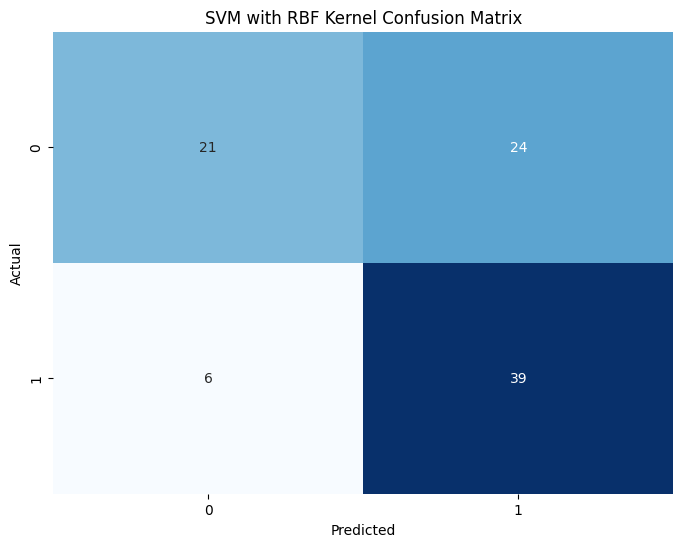

In [113]:
from sklearn.svm import SVC

# Initialize the SVM classifier with RBF kernel
clf_svm_rbf = SVC(kernel='rbf', random_state=42)

# Train the classifier
clf_svm_rbf.fit(df3_X_train, df3_y_train)

# Make predictions on the test set
y_pred_svm_rbf = clf_svm_rbf.predict(df3_X_test)

# Generate confusion matrix for SVM with RBF kernel
cm_svm_rbf = confusion_matrix(df3_y_test, y_pred_svm_rbf)

# Calculate accuracy metrics for SVM with RBF kernel
accuracy_svm_rbf = accuracy_score(df3_y_test, y_pred_svm_rbf)
precision_svm_rbf = precision_score(df3_y_test, y_pred_svm_rbf)
recall_svm_rbf = recall_score(df3_y_test, y_pred_svm_rbf)
f1_svm_rbf = f1_score(df3_y_test, y_pred_svm_rbf)

print("SVM with RBF Kernel Confusion Matrix:")
print(cm_svm_rbf)
print("SVM with RBF Kernel Accuracy:", accuracy_svm_rbf)
print("SVM with RBF Kernel Precision:", precision_svm_rbf)
print("SVM with RBF Kernel Recall:", recall_svm_rbf)
print("SVM with RBF Kernel F1-score:", f1_svm_rbf)

# Plot confusion matrix heatmap for SVM with RBF kernel
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_rbf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM with RBF Kernel Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

SVM classifier with Sigmoid kernel

SVM with Sigmoid Kernel Confusion Matrix:
[[ 0 45]
 [ 0 45]]
SVM with Sigmoid Kernel Accuracy: 0.5
SVM with Sigmoid Kernel Precision: 0.5
SVM with Sigmoid Kernel Recall: 1.0
SVM with Sigmoid Kernel F1-score: 0.6666666666666666


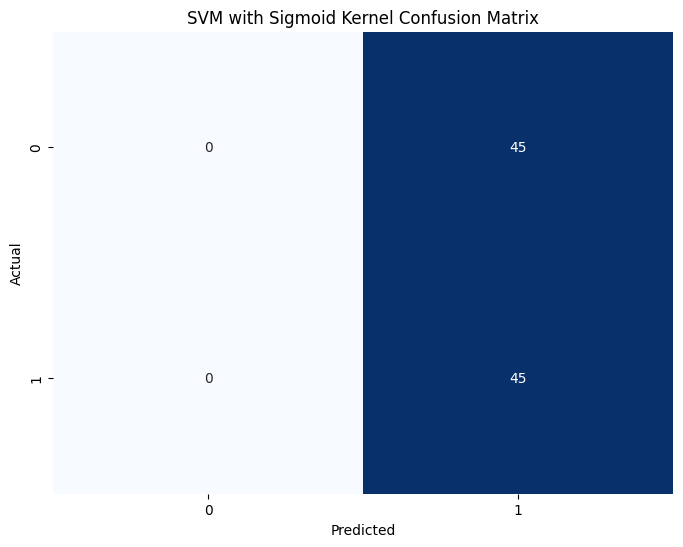

In [114]:
from sklearn.svm import SVC

# Initialize the SVM classifier with Sigmoid kernel
clf_svm_sigmoid = SVC(kernel='sigmoid', random_state=42)

# Train the classifier
clf_svm_sigmoid.fit(df3_X_train, df3_y_train)

# Make predictions on the test set
y_pred_svm_sigmoid = clf_svm_sigmoid.predict(df3_X_test)

# Generate confusion matrix for SVM with Sigmoid kernel
cm_svm_sigmoid = confusion_matrix(df3_y_test, y_pred_svm_sigmoid)

# Calculate accuracy metrics for SVM with Sigmoid kernel
accuracy_svm_sigmoid = accuracy_score(df3_y_test, y_pred_svm_sigmoid)
precision_svm_sigmoid = precision_score(df3_y_test, y_pred_svm_sigmoid)
recall_svm_sigmoid = recall_score(df3_y_test, y_pred_svm_sigmoid)
f1_svm_sigmoid = f1_score(df3_y_test, y_pred_svm_sigmoid)

print("SVM with Sigmoid Kernel Confusion Matrix:")
print(cm_svm_sigmoid)
print("SVM with Sigmoid Kernel Accuracy:", accuracy_svm_sigmoid)
print("SVM with Sigmoid Kernel Precision:", precision_svm_sigmoid)
print("SVM with Sigmoid Kernel Recall:", recall_svm_sigmoid)
print("SVM with Sigmoid Kernel F1-score:", f1_svm_sigmoid)

# Plot confusion matrix heatmap for SVM with Sigmoid kernel
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_sigmoid, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM with Sigmoid Kernel Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 10 - Model Comparison

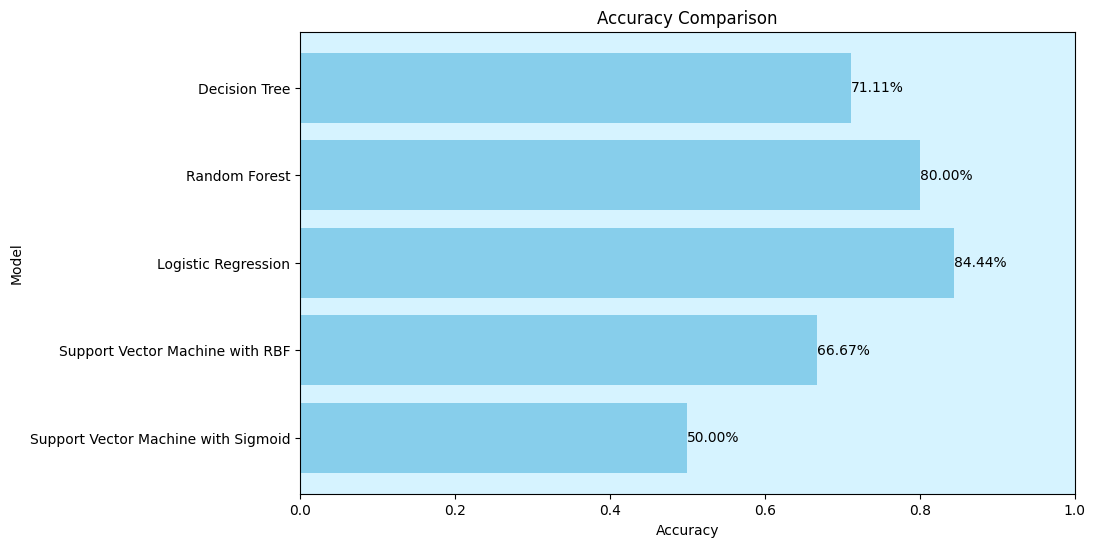

In [116]:
# List of classifiers and their corresponding accuracy scores
classifiers = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Support Vector Machine with RBF','Support Vector Machine with Sigmoid']
accuracies = [accuracy_decisiontree, accuracy_rf, accuracy_lr, accuracy_svm_rbf, accuracy_svm_sigmoid]

# Plotting the accuracy scores with percentages
plt.figure(figsize=(10, 6))
bars = plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Comparison')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy at the top

# Percentage labels on each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{accuracy*100:.2f}%',
             va='center', ha='left', fontsize=10, color='black')

plt.show()

In [119]:
import pickle

model = [clf_decisiontree,clf_lr,clf_rf,clf_svm_rbf,clf_svm_sigmoid]
with open('model_dt1.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Done")

Done


In [120]:
open_file = open('model_dt1.pkl', "rb")
loaded_model = pickle.load(open_file)
open_file.close()
print("Done")

Done
